In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

#  데이터 로드


In [62]:
df = pd.read_csv('../ddata/pima-indians-diabetes.data.csv',encoding='euc-kr')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 결측치 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
# 3) 각 피처별 최소값이 0으로 측정되는 데이타값을 평균값으로 변경하여라.
for c in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    idx = np.where(df[c]==0)[0]
    df.loc[idx,c] = df[c].mean()

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.shape

(768, 9)

# 정규화

In [25]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1


In [101]:
x_data.shape, y_data.shape

((768, 8), (768, 1))

In [102]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values

In [103]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

x = tf.constant(x_scaled, tf.float32)
y = tf.constant(y_data, tf.float32)

In [104]:
initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape=[8,1]))
b = tf.Variable(initX(shape=[1]))

In [105]:
def compute_loss():
#     hx = tf.matmul(x,w) + b
    z = tf.matmul(x,w) + b
    hx = tf.nn.sigmoid(z)  # (뉴럴 네트워크)
    

#     cost = tf.reduce_mean((hx-y)**2)

    # 라벨 = 정답(y)   logits= 시그모이드 (z)
    # 미분이 안되기 때문에 로그 씌워서 
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z)
    cost = tf.reduce_mean(cost_i)
    return cost
    

In [106]:
optimizer = Adam(0.01)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    print(i, 'cost:', compute_loss().numpy() )

0 cost: 0.8220277
1 cost: 0.8131072
2 cost: 0.80452394
3 cost: 0.79627174
4 cost: 0.788332
5 cost: 0.78067607
6 cost: 0.7732754
7 cost: 0.76610774
8 cost: 0.75915813
9 cost: 0.75241596
10 cost: 0.74587226
11 cost: 0.7395191
12 cost: 0.7333495
13 cost: 0.7273573
14 cost: 0.72153777
15 cost: 0.71588635
16 cost: 0.7103999
17 cost: 0.705075
18 cost: 0.6999095
19 cost: 0.6949008
20 cost: 0.69004613
21 cost: 0.68534297
22 cost: 0.68078786
23 cost: 0.6763776
24 cost: 0.6721081
25 cost: 0.6679749
26 cost: 0.66397333
27 cost: 0.66009825
28 cost: 0.6563449
29 cost: 0.6527076
30 cost: 0.6491812
31 cost: 0.64576006
32 cost: 0.64243835
33 cost: 0.63921064
34 cost: 0.6360714
35 cost: 0.63301516
36 cost: 0.630037
37 cost: 0.6271321
38 cost: 0.6242962
39 cost: 0.6215251
40 cost: 0.61881524
41 cost: 0.6161634
42 cost: 0.6135666
43 cost: 0.61102206
44 cost: 0.60852784
45 cost: 0.6060821
46 cost: 0.60368294
47 cost: 0.60132897
48 cost: 0.599019
49 cost: 0.59675163
50 cost: 0.59452575
51 cost: 0.5923403
5

420 cost: 0.46326232
421 cost: 0.46325898
422 cost: 0.46325573
423 cost: 0.46325257
424 cost: 0.46324944
425 cost: 0.46324635
426 cost: 0.46324348
427 cost: 0.4632405
428 cost: 0.46323764
429 cost: 0.4632348
430 cost: 0.46323204
431 cost: 0.4632294
432 cost: 0.46322677
433 cost: 0.46322414
434 cost: 0.46322164
435 cost: 0.46321917
436 cost: 0.4632167
437 cost: 0.4632143
438 cost: 0.463212
439 cost: 0.46320972
440 cost: 0.4632075
441 cost: 0.46320534
442 cost: 0.4632032
443 cost: 0.46320105
444 cost: 0.46319905
445 cost: 0.463197
446 cost: 0.4631951
447 cost: 0.46319318
448 cost: 0.46319124
449 cost: 0.4631894
450 cost: 0.46318755
451 cost: 0.4631858
452 cost: 0.4631841
453 cost: 0.46318248
454 cost: 0.46318075
455 cost: 0.46317914
456 cost: 0.46317756
457 cost: 0.46317598
458 cost: 0.46317446
459 cost: 0.46317303
460 cost: 0.46317157
461 cost: 0.46317017
462 cost: 0.46316877
463 cost: 0.46316734
464 cost: 0.463166
465 cost: 0.46316472
466 cost: 0.4631635
467 cost: 0.46316218
468 cost: 

871 cost: 0.46310878
872 cost: 0.46310878
873 cost: 0.46310887
874 cost: 0.46310887
875 cost: 0.4631088
876 cost: 0.4631088
877 cost: 0.4631088
878 cost: 0.4631088
879 cost: 0.46310878
880 cost: 0.46310875
881 cost: 0.46310878
882 cost: 0.46310878
883 cost: 0.46310878
884 cost: 0.4631088
885 cost: 0.46310878
886 cost: 0.46310887
887 cost: 0.46310878
888 cost: 0.46310878
889 cost: 0.46310878
890 cost: 0.46310878
891 cost: 0.4631088
892 cost: 0.4631088
893 cost: 0.4631088
894 cost: 0.46310878
895 cost: 0.46310878
896 cost: 0.46310878
897 cost: 0.46310878
898 cost: 0.46310878
899 cost: 0.46310878
900 cost: 0.46310878
901 cost: 0.46310875
902 cost: 0.46310878
903 cost: 0.46310878
904 cost: 0.46310878
905 cost: 0.46310878
906 cost: 0.46310878
907 cost: 0.46310878
908 cost: 0.46310878
909 cost: 0.46310878
910 cost: 0.46310878
911 cost: 0.4631088
912 cost: 0.4631088
913 cost: 0.4631088
914 cost: 0.4631088
915 cost: 0.46310878
916 cost: 0.4631088
917 cost: 0.46310878
918 cost: 0.4631088
919 co

In [107]:
def hxfn(xdata):
    xd = tf.constant(xdata,tf.float32)
    z = tf.matmul(xd,w ) + b
    hx = tf.nn.sigmoid(z)
#     return z.numpy(),hx.numpy()
    return (hx.numpy() > 0.5) + 0    # 1 일경우 합, 0일경우 불합.

# 2. 6,148,72,35,0,33.6,0.627,50 당뇨유무 판별

In [110]:
hxfn([x_scaled[0]])

array([[1]])

In [93]:
hxfn(scaler.transform( [[6,148,72,35,0,33.6,0.627,50]] ))

array([[1]])

# 3. confusion matrix, 정확도, f1 score

In [114]:
 pred1 = hxfn(x_scaled)

In [115]:
y_data.shape, pred.shape,  pred1.shape

((768, 1), (768, 1), (768, 1))

In [116]:

from sklearn.metrics import confusion_matrix

# 오차행렬
confusion_matrix(y_data, pred1)

array([[446,  54],
       [114, 154]], dtype=int64)

<AxesSubplot:>

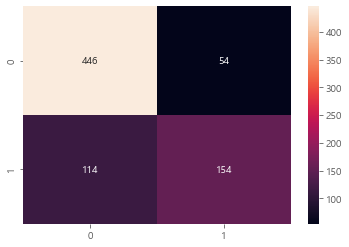

In [123]:
sns.heatmap(confusion_matrix(y_data, pred1),annot=True,fmt='d')

In [120]:
from sklearn.metrics import accuracy_score
# 정확도
accuracy_score(y_data,pred1)

0.78125

In [121]:
# f1
from sklearn.metrics import f1_score 

f1_score(y_data,pred1)


0.6470588235294118